In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/NSSO68 (1).csv")
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2.0,12.000000,154.18
1,2,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2.0,333.000000,484.95
2,3,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2.0,35.000000,214.84
3,4,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2.0,168.333333,302.30
4,5,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2.0,15.000000,148.00


In [7]:
guj = df[df['state_1']=="GUJ"]

# Check if there are any missing values in the data, identify them, and if there are, replace them with the mean of the variable

In [8]:
guj.isnull().sum().sort_values(ascending = False)


soyabean_q                    1714
soyabean_v                    1714
Otherwise_possessed           1670
Land_Leased_out               1654
During_July_June_Irrigated    1641
                              ... 
tamato_q                         0
onion_q                          0
potato_q                         0
emftt_q                          0
fv_tot                           0
Length: 384, dtype: int64

In [9]:
df.columns


Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [10]:
guj_new = guj[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]
guj_new

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home
0,GUJ,7,2,2.0,242,1.000000,6.800000,0.050000,0,0.000000,0.0,30.942394,0.000000,59.0
1,GUJ,7,2,2.0,242,1.000000,4.500000,1.125000,0,0.000000,0.5,29.286153,17.500000,56.0
2,GUJ,7,2,2.0,242,2.000000,6.000000,0.200000,0,0.000000,0.0,31.527046,0.000000,60.0
3,GUJ,7,2,2.0,242,1.666667,6.666667,0.533333,0,0.333333,0.2,27.834607,33.333333,60.0
4,GUJ,7,2,2.0,242,1.250000,2.500000,0.125000,0,0.000000,0.0,27.600713,75.000000,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13778,GUJ,5,2,2.0,242,3.000000,5.000000,0.250000,0,0.000000,0.0,22.150260,15.000000,60.0
13779,GUJ,5,2,2.0,242,3.000000,5.000000,0.400000,0,0.000000,0.0,22.320220,4.000000,60.0
13780,GUJ,5,2,2.0,242,4.000000,8.000000,0.500000,0,0.000000,0.0,23.470430,0.000000,60.0
13781,GUJ,5,2,2.0,242,4.000000,6.500000,0.500000,0,0.000000,0.0,26.090420,0.000000,60.0


In [11]:
guj_new.isnull().sum().sort_values(ascending = False)

state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
Meals_At_Home       0
dtype: int64

In [12]:
guj_clean = guj_new.copy()
guj_clean.loc[:, 'Meals_At_Home'] = guj_clean['Meals_At_Home'].fillna(guj_new['Meals_At_Home'].mean())
guj_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

**Interpretation:**The attribute Meals_At_Home had one missing value which was replaced by the mean- mean imputation


# Check for outliers, describe your test’s outcome, and make suitable amendments.

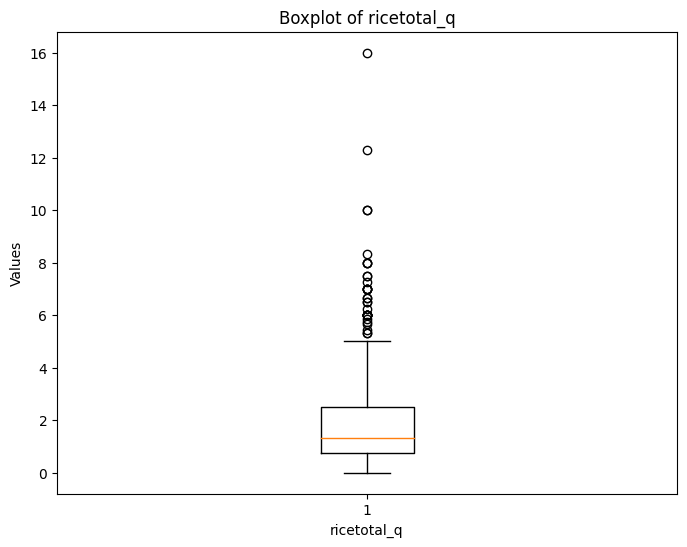

In [13]:
# Detecting outliers using the IQR method
#Checking for outliers
import matplotlib.pyplot as plt
# Assuming AP_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(guj_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [14]:
rice1 = guj_clean['ricetotal_q'].quantile(0.25)
rice2 = guj_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

{'whiskers': [<matplotlib.lines.Line2D at 0x7a9ced874c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9ced8751b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9ced8749a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9ced8756f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9ced875990>],
 'means': []}

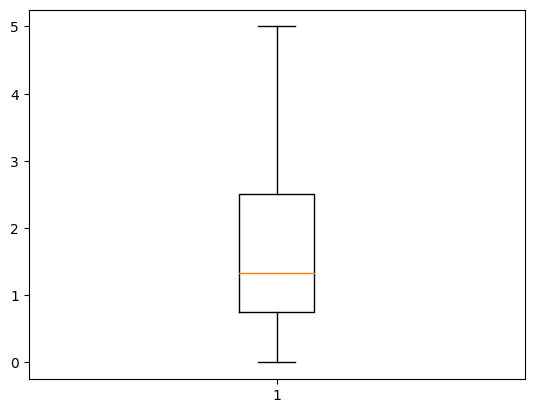

In [15]:
guj_clean=guj_new[(guj_new['ricetotal_q']<=up_limit)&(guj_new['ricetotal_q']>=low_limit)]
plt.boxplot(guj_clean['ricetotal_q'])


**Interpretation:** The boxplot of the variable 'ricetotal_q' reveals the presence of an outlier. Outliers can distort statistical analyses and lead to misleading conclusions, compromising the accuracy and reliability of data-driven decisions. To address this, we used the interquartile range (IQR) method to remove outliers. The IQR is calculated as the difference between the upper and lower quartiles. Data points that fall beyond 1.5 times the IQR from either quartile are identified as outliers. These outliers are then excluded or treated to ensure the robustness of the analysis.

# Rename the districts and sectors, viz., rural and urban.
( District codes taken as given in the SCMA github repository )

In [36]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [16]:
guj_clean['District'].unique()

array([ 7, 14,  6,  1, 11,  9, 10, 12,  8, 13, 19, 22, 24, 21, 25, 20,  5,
        4,  3,  2, 15, 17, 16, 18])

In [17]:
# Replace values in the 'Sector' column
guj_clean.loc[:,'Sector'] = guj_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [18]:
#total consumption
guj_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [19]:
guj_clean.loc[:, 'total_consumption'] = guj_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)
guj_clean.head()

<ipython-input-19-ea8d8a1a87e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guj_clean.loc[:, 'total_consumption'] = guj_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
0,GUJ,7,RURAL,2.0,242,1.000000,6.800000,0.050000,0,0.000000,0.0,30.942394,0.000000,59.0,38.792394
1,GUJ,7,RURAL,2.0,242,1.000000,4.500000,1.125000,0,0.000000,0.5,29.286153,17.500000,56.0,53.911153
2,GUJ,7,RURAL,2.0,242,2.000000,6.000000,0.200000,0,0.000000,0.0,31.527046,0.000000,60.0,39.727046
3,GUJ,7,RURAL,2.0,242,1.666667,6.666667,0.533333,0,0.333333,0.2,27.834607,33.333333,60.0,70.567940
4,GUJ,7,RURAL,2.0,242,1.250000,2.500000,0.125000,0,0.000000,0.0,27.600713,75.000000,59.0,106.475713


In [ ]:
#by region
guj_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

In [20]:
#by district
guj_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                42.504093  61.940124  226.483975  26.407434
2                35.080824  54.958668  163.675758  23.700306
3                15.631610  44.490268   80.020572  18.700417
4                15.170668  42.256020   71.225525  16.871614
5                13.602118  33.736343   79.400450  16.246437
6                44.027452  57.999906  251.780840  18.777763
7                48.628619  55.413905  535.483793   0.000000
8                26.461245  41.197994  110.000000   0.000000
9                52.135232  59.408911  561.094237   0.000000
10               28.020816  44.563342  212.430244   0.000000
11               15.541708  41.991166  111.897317  25.768995
12               18.882882  49.227288  106.200605  25.010600
13               23.521490  47.649756  118.980680  17.156254
14               28.854050  49.740866  149.060540   0.000000
15               21.339258  46.000247  131.651275  14.720360
16               11.454437  36.202343   63.141875  19.413506
17               39.676193  63.512671  203.225700   0.000000
18               30.435490  46.827848  150.000000   0.000000
19               39.986807  64.480821  234.661000   0.000000
20               20.379571  47.711390  132.150173  24.733900
21               37.724107  58.827752  181.900750  22.805750
22               24.240639  55.606628  168.343908   0.000000
24               42.539541  63.994930  247.938362  22.968280
25               50.572019  72.242954  179.713825   0.000000

In [21]:
total_consumption_by_districtcode=guj_clean.groupby('District')['total_consumption'].sum()
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
7     19228.625112
22    13345.590732
19     9736.603959
Name: total_consumption, dtype: float64

In [22]:
guj_clean.loc[:,"District"] = guj_clean.loc[:,"District"].replace({7: "Ahmedabad", 22: "Surat", 19: "Vadodara"})
total_consumption_by_districtname=guj_clean.groupby('District')['total_consumption'].sum()
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Ahmedabad    19228.625112
Surat        13345.590732
Vadodara      9736.603959
Name: total_consumption, dtype: float64

In [24]:
from statsmodels.stats import weightstats as stests
rural=guj_clean[guj_clean['Sector']=="RURAL"]
urban=guj_clean[guj_clean['Sector']=="URBAN"]
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
0,GUJ,Ahmedabad,RURAL,2.0,242,1.000000,6.800000,0.050000,0,0.000000,0.0,30.942394,0.000000,59.0,38.792394
1,GUJ,Ahmedabad,RURAL,2.0,242,1.000000,4.500000,1.125000,0,0.000000,0.5,29.286153,17.500000,56.0,53.911153
2,GUJ,Ahmedabad,RURAL,2.0,242,2.000000,6.000000,0.200000,0,0.000000,0.0,31.527046,0.000000,60.0,39.727046
3,GUJ,Ahmedabad,RURAL,2.0,242,1.666667,6.666667,0.533333,0,0.333333,0.2,27.834607,33.333333,60.0,70.567940
4,GUJ,Ahmedabad,RURAL,2.0,242,1.250000,2.500000,0.125000,0,0.000000,0.0,27.600713,75.000000,59.0,106.475713


In [ ]:
urban.head()

#Test whether the differences in the means are significant or not.

ANALYZING THE MEAN DIFFERENCES<br><br>
H0: There is no significant difference between the consumption in rural and urban areas<br>
H1: There is a significant difference in the consumption of rurala nd urban areas

In [27]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [28]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 9.345789318547258
P-Value: 9.12066079711807e-21

Since the p value is less than the level of significance 0.05, we reject the null hypothesis. This implies that there is a significant difference between the means of total consumption of rural as well as urban areas.
